In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot

In [49]:
train = pd.read_csv('./data/total_rent.csv')
train.head(5)

train2 = pd.read_csv('./data/total_return.csv')

In [50]:
station = pd.read_csv('./data/station.csv')
station.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [51]:
train.describe()

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
count,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06,3.784320e+06
mean,7.250000e+01,2.014000e+03,6.526027e+00,1.572055e+01,1.150000e+01,2.997260e+00,1.490411e+00,1.354234e+01,1.164612e-01,1.551697e+00,7.174365e+01,2.136225e-01,8.718658e-01
std,4.156822e+01,8.164967e-01,3.447852e+00,8.796248e+00,6.922187e+00,1.998400e+00,1.116767e+00,1.060540e+01,8.525105e-01,1.102337e+00,2.014623e+01,1.457200e+00,2.230186e+00
min,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.650000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00
25%,3.675000e+01,2.013000e+03,4.000000e+00,8.000000e+00,5.750000e+00,1.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00,8.000000e-01,5.800000e+01,0.000000e+00,0.000000e+00
50%,7.250000e+01,2.014000e+03,7.000000e+00,1.600000e+01,1.150000e+01,3.000000e+00,1.000000e+00,1.435000e+01,0.000000e+00,1.300000e+00,7.500000e+01,0.000000e+00,0.000000e+00
75%,1.082500e+02,2.015000e+03,1.000000e+01,2.300000e+01,1.725000e+01,5.000000e+00,2.000000e+00,2.270000e+01,0.000000e+00,2.100000e+00,8.900000e+01,0.000000e+00,1.000000e+00
max,1.440000e+02,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,3.000000e+00,3.590000e+01,3.600000e+01,9.100000e+00,1.000000e+02,1.840000e+01,1.080000e+02


In [52]:
train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)

STATION
3      174269.0
56      90884.0
31      83360.0
17      82713.0
32      73472.0
33      71000.0
14      57338.0
21      56186.0
105     56182.0
55      55047.0
Name: RENTCOUNT, dtype: float64

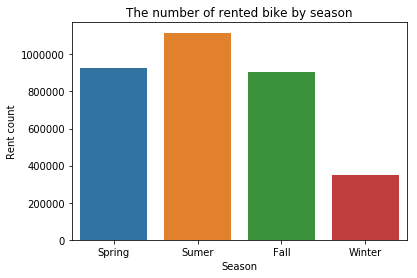

In [53]:
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y=group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['Spring', 'Sumer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

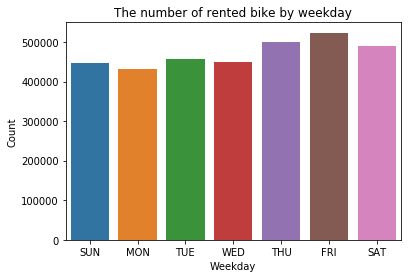

In [54]:
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel = 'Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

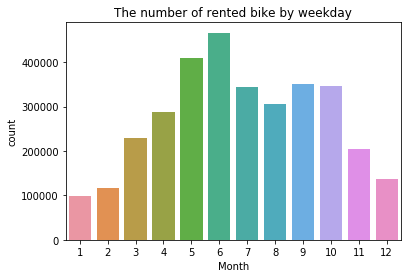

In [55]:
group_mn = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'], y=group_mn['RENTCOUNT'])
ax.set(xlabel='Month', ylabel='count')
plt.title('The number of rented bike by weekday')
plt.show()

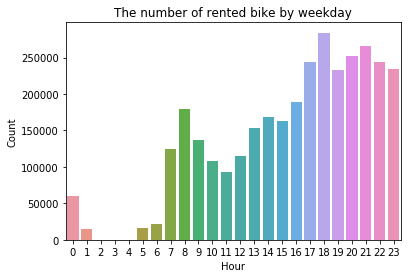

In [56]:
group_hr = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by weekday')
plt.show()

In [57]:
import statistics

top10 = train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)
top10_return = train2.groupby(['STATION'])['RETURNCOUNT'].sum().nlargest(10)

# Rent Stattion
top10_lat = []
top10_lon = []

# Return Station
top10_lat2 = []
top10_lon2 = []

top10_station = top10.index
top10_station2 = top10_return.index

for i in range(10):
    location = station[station['번호'].isin([top10.index[i]])]
    location2 = station[station['번호'].isin([top10_return.index[i]])]
    
    # Rent
    top10_lat.append(float(location['좌표'].iloc[0].split(',')[0]))
    top10_lon.append(float(location['좌표'].iloc[0].split(',')[1]))
    
    # Return
    top10_lat2.append(float(location2['좌표'].iloc[0].split(',')[0]))
    top10_lon2.append(float(location2['좌표'].iloc[0].split(',')[1]))


In [58]:
tashu = pd.read_csv('./data/tashu.csv')
tashu = tashu.dropna(axis=0)

tashu = tashu[tashu.RENT_DATE != 0]
tashu = tashu[tashu.RETURN_DATE != 0]
tashu = tashu[tashu.RENT_STATION != 0]
tashu = tashu[tashu.RETURN_STATION != 0]

test = tashu.groupby(["RENT_STATION", "RETURN_STATION"]).size().reset_index(name="ROUTECOUNT")
route = test.sort_values(["ROUTECOUNT"], ascending=[False])


route['RENT_STATION'] = pd.to_numeric(route['RENT_STATION'])
route['RETURN_STATION'] = pd.to_numeric(route['RETURN_STATION'])

top10_route = route.loc [(route['RENT_STATION'] < 145) & (route['RETURN_STATION'] < 145) ].reset_index()

top10_route.head(10)

,index,RENT_STATION,RETURN_STATION,ROUTECOUNT
0,342,3,3,84496
1,4873,31,31,21749
2,8708,56,56,18343
3,3361,21,105,17220
4,0,1,1,14489
5,5045,32,32,12177
6,15442,105,21,12154
7,5218,33,33,11973
8,2625,17,17,11966
9,8684,56,32,11868


In [59]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(top10_lat), statistics.median(top10_lon), 14)

for i in range(10):
    rent_lat = []
    rent_lon = []

    return_lat = []
    return_lon = []

    rent_location = station[station['번호'].isin([top10_route['RENT_STATION'][i]])]
    return_location = station[station['번호'].isin([top10_route['RETURN_STATION'][i]])]
    
    # Rent
    rent_lat.append(float(rent_location['좌표'].iloc[0].split(',')[0]))
    rent_lon.append(float(rent_location['좌표'].iloc[0].split(',')[1]))
    
    # Return
    return_lat.append(float(return_location['좌표'].iloc[0].split(',')[0]))
    return_lon.append(float(return_location['좌표'].iloc[0].split(',')[1]))
    
    rent_lat.extend(return_lat)
    rent_lon.extend(return_lon)
    
    print(rent_lat, rent_lon)
    gmapl.scatter(rent_lat, rent_lon, '#ff0000', size=50, marker=False)
    gmapl.plot(rent_lat, rent_lon,  'cornflowerblue', edge_width = 2.5)
    
    
gmapl.draw('./top10_route.html')

[36.369855, 36.369855] [127.388749, 127.388749]
[36.361773, 36.361773] [127.357485, 127.357485]
[36.361736, 36.361736] [127.344994, 127.344994]
[36.373457, 36.364177] [127.359293, 127.358845]
[36.374325, 36.374325] [127.387462, 127.387462]
[36.359293, 36.359293] [127.354503, 127.354503]
[36.364177, 36.373457] [127.358845, 127.359293]
[36.358494, 36.358494] [127.361197, 127.361197]
[36.35219, 36.35219] [127.378814, 127.378814]
[36.361736, 36.359293] [127.344994, 127.354503]


In [64]:
import bokeh
import matplotlib
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

In [65]:
hv.extension('bokeh')
hv.output(size=200)

ImportError: None of the backends could be imported